# Imports

In [1]:
import pandas as pd
import yaml
import os
project_dir = 'C:\\Users\\diego\\OneDrive\\Cursos\\Python\\learning_curve'

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay

# Params

In [2]:
params = {'min_samples_leaf': 5000, 'max_depth': 3, 'class_weight': 'balanced', 'n_estimators' : 100, 'random_state' : 777}

In [3]:
features = yaml.safe_load(open(os.path.join(project_dir, 'src', 'feature', 'config', 'variaveis.yaml'), 'rb'))

In [4]:
clf = RandomForestClassifier(**params)

# Data

In [5]:
treino = pd.read_parquet(os.path.join(project_dir, 'data', 'feat', 'treino.parquet.gzip'))

# Learning Curve

Text(0.5, 1.0, 'Learning Curve for RandomForest')

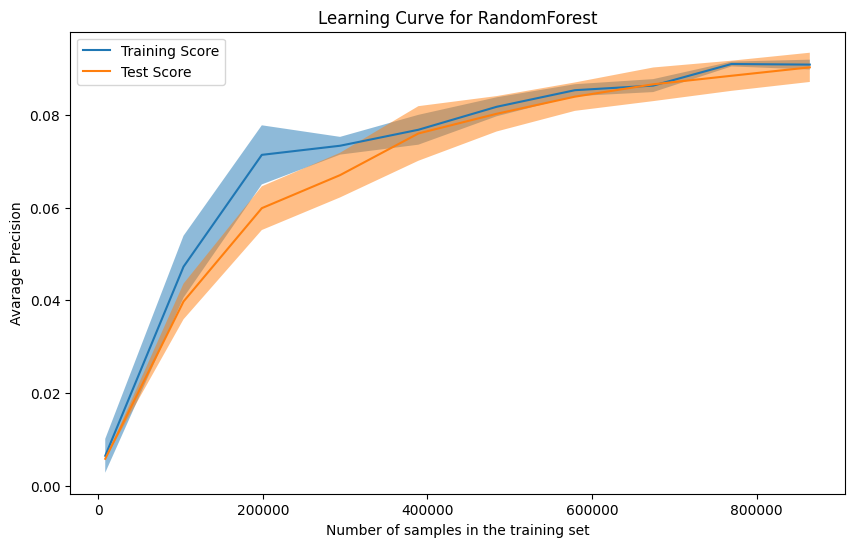

C:\Users\diego\anaconda3\envs\favorite-env\Lib\site-packages\joblib\_memmapping_reducer.py:598: UserWarning: Failed to delete temporary folder: C:\Users\diego\AppData\Local\Temp\joblib_memmapping_folder_14040_095477043aea4b59bdc5db2f1691d775_3d93212fd7654b3b97713a5bebe81d53
  warnings.warn("Failed to delete temporary folder: {}"


In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

LearningCurveDisplay.from_estimator(clf, treino[features['descritivas']], treino['is_fraud'], 
                                    train_sizes=np.linspace(0.01, 1, 10),cv=3,n_jobs=-1, 
                                    scoring=make_scorer(average_precision_score), 
                                    score_name='Avarage Precision',
                                    std_display_style='fill_between' ,ax=ax, random_state=777)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for RandomForest")